In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img = cv2.imread('cat.jpg',0)

In [4]:
template = cv2.imread('catface.png',0)
h, w = template.shape[:2]

In [5]:
img.shape

(480, 790)

In [6]:
template.shape

(184, 193)

In [7]:
methods = ['cv2.TM_CCOEFF','cv2.CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [8]:
res = cv2.matchTemplate(img,template,1)
res.shape

(297, 598)

In [9]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [10]:
min_val

0.0001509892026660964

In [11]:
max_val

0.41406357288360596

In [12]:
min_loc

(504, 10)

In [13]:
max_loc

(460, 88)

4


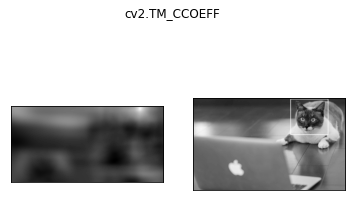

AttributeError: module 'cv2.cv2' has no attribute 'CCOEFF_NORMED'

In [14]:
for meth in methods:
    img2 = img.copy()
    
    method = eval(meth)
    print (method)
    res = cv2.matchTemplate(img, template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img2, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()